## Dataset - Fraud_check

## Objective:-Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Importing important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

Load the data set

In [2]:
data=pd.read_csv("E:\\Study\\ASSIGNMENTS\\Decission tree\\Fraud_check.csv")

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


Understand the data set

In [4]:
data.shape

(600, 6)

# Checking for null values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


### Checking of duplicate values

In [7]:
data[data.duplicated(keep= False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


### Check the distribution of the numerical column of data using distplot

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

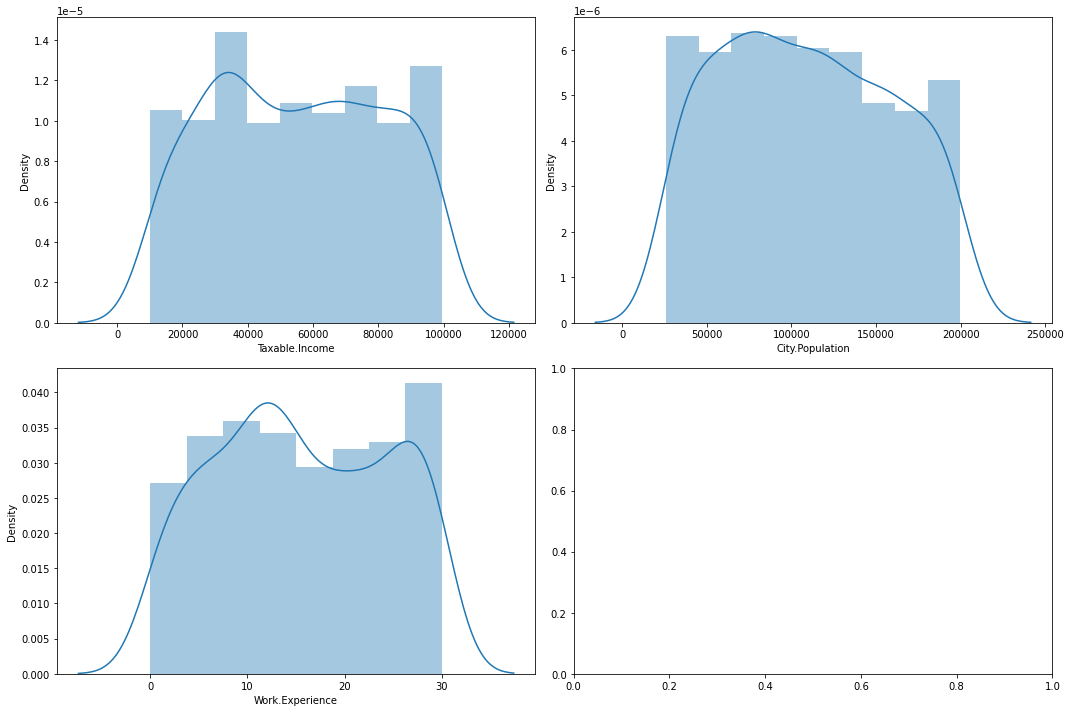

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

sns.distplot(data["Taxable.Income"], ax=ax[0,0])
sns.distplot(data["City.Population"], ax=ax[0,1])
sns.distplot(data["Work.Experience"], ax=ax[1,0])


plt.tight_layout()
plt.show()

### We will create numerical variable for categorical data

In [9]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 
data['Urban']= label_encoder.fit_transform(data['Urban'])

In [10]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


### We will take high income above 30000 

In [11]:
data["Taxable.Income"]=(data["Taxable.Income"]>30000)*1

In [12]:
x=data.drop(axis=0,columns="Taxable.Income")
y=data["Taxable.Income"]

### Splitting data into training and testing data set

In [13]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)


In [14]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Plot the decission tree

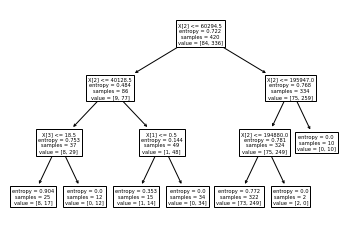

In [15]:
tree.plot_tree(model);

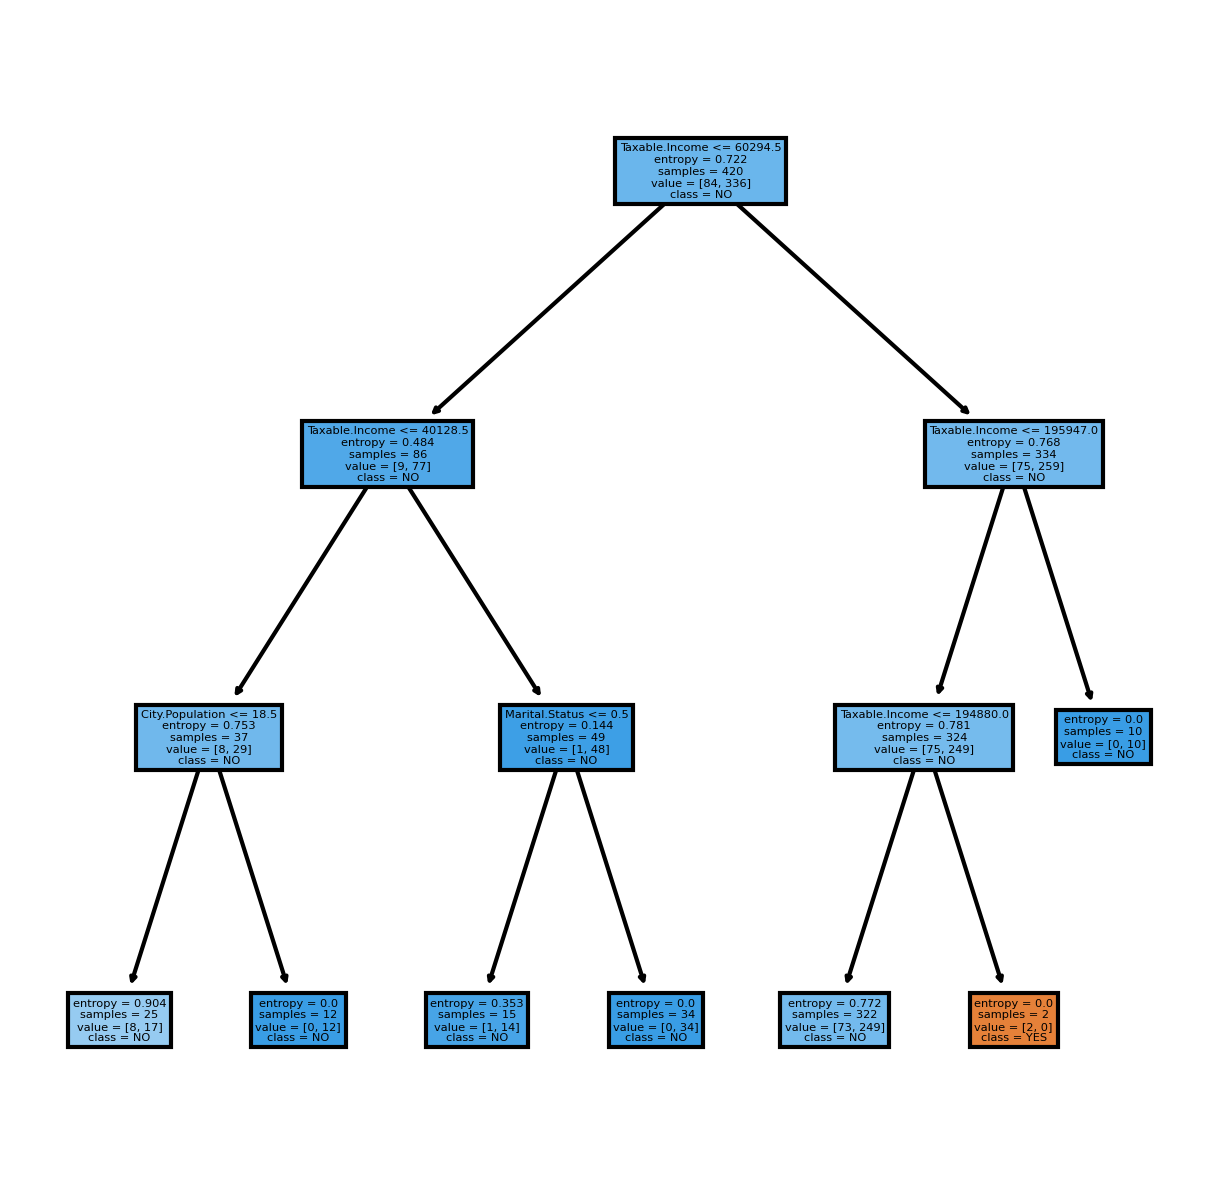

In [16]:
fn=["Undergrad","Marital.Status","Taxable.Income","City.Population","Work.Experience"]
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [17]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.8047619047619048

In [18]:
model.score(x_test, y_test)

0.7722222222222223

In [19]:
model.feature_importances_

array([0.        , 0.06539193, 0.7372232 , 0.19738486, 0.        ])

In [20]:
y_pred = model.predict(x_test)

### Here first column is for 'Good', & second is for 'Risky'

In [21]:
model.predict_proba(x_test)

array([[0.32      , 0.68      ],
       [0.        , 1.        ],
       [0.22670807, 0.77329193],
       [0.22670807, 0.77329193],
       [0.22670807, 0.77329193],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.22670807, 0.77329193],
       [0.        , 1.        ],
       [0.06666667, 0.93333333],
       [0.22670807, 0.77329193],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.22670807, 0.77329193],
       [0.22670807, 0.77329193],
       [0.22670807, 0.77329193],
       [1.        , 0.        ],
       [0.22670807, 0.77329193],
       [0.32      , 0.68      ],
       [0.22670807, 0.77329193],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.22670807, 0.77329193],
       [0.22670807, 0.77329193],
       [0.22670807, 0.77329193],
       [0.        , 1.        ],
       [0.22670807, 0.77329193],
       [0.06666667, 0.93333333],
       [0.22670807, 0.77329193],
       [0.

### confusion matrix


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred) 
cm

array([[  0,  40],
       [  1, 139]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.7722222222222223')

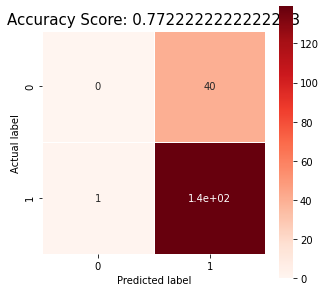

In [24]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Reds')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

### Predicting the values of test data

In [25]:
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.78      0.99      0.87       140

    accuracy                           0.77       180
   macro avg       0.39      0.50      0.44       180
weighted avg       0.60      0.77      0.68       180



In [26]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 40)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [27]:
train_accuracy

[0.8,
 0.8,
 0.8047619047619048,
 0.8095238095238095,
 0.8238095238095238,
 0.8285714285714286,
 0.8380952380952381,
 0.8452380952380952,
 0.8642857142857143,
 0.8666666666666667]

In [28]:
test_accuracy

[0.7777777777777778,
 0.7777777777777778,
 0.7722222222222223,
 0.7611111111111111,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7333333333333333,
 0.7277777777777777]

In [29]:
accuracies = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.800000,0.777778
1,2,0.800000,0.777778
2,3,0.804762,0.772222
3,4,0.809524,0.761111
4,5,0.823810,0.766667
5,6,0.828571,0.766667
6,7,0.838095,0.766667
7,8,0.845238,0.766667
8,9,0.864286,0.733333
9,10,0.866667,0.727778


### visulizing accuracy graph to look over max_depth

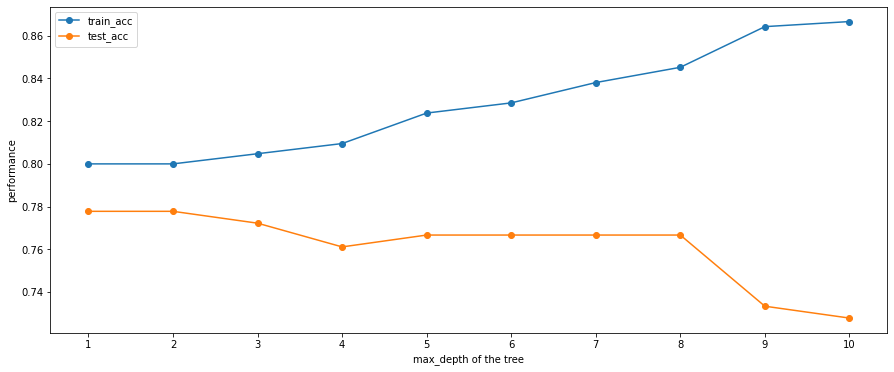

In [30]:
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(accuracies['max_depth'],accuracies['train_acc'], marker = 'o')
plt.plot(accuracies['max_depth'], accuracies['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

### Decision Tree Regression

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
X=data.drop(axis=0,columns="Taxable.Income")
y=data["Taxable.Income"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [34]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

### Find the accuracy

In [35]:
model.score(X_test,y_test)

-0.869281045751634

## Conclusion:-We can see maximum depth of tree 3 is good as accuracy prospective & classsification is good technique for predict the sale & regression is not usual to good at this dataset